## 우리나라 인구 소멸 위기 지역 분석

### 데이터 준비하기

In [34]:
import pandas as pd
import numpy as np

import platform 
import matplotlib.pyplot as plt
from matplotlib import rc 
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False

In [3]:
population = pd.read_excel('../Data/05. population_raw_data.xlsx', header=1)
population.fillna(method='pad', inplace =True)
population.head()
population.rename(columns = {
    '행정구역(동읍면)별(1)':'광역시도',
    '행정구역(동읍면)별(2)':'시도',
    '계':'인구수'}, inplace=True)

population = population[(population['시도'] != '소계')]
population

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,제주특별자치도,제주시,남자인구수 (명),235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0
842,제주특별자치도,제주시,여자인구수 (명),234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0
843,제주특별자치도,서귀포시,총인구수 (명),170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0
844,제주특별자치도,서귀포시,남자인구수 (명),86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0


In [10]:
population.is_copy = False
population.rename(columns={'항목':'구분'}, inplace=True)
population.loc[population['구분']=='총인구수 (명)', '구분']='합계'
population.loc[population['구분']=='남자인구수 (명)', '구분']='남자'
population.loc[population['구분']=='여자인구수 (명)', '구분']='여자'

population.reset_index(inplace=True)
population.drop(columns=['index', 'level_0'], inplace=True)

In [11]:
population

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
1,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
2,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
3,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
4,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,제주특별자치도,제주시,남자,235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0
788,제주특별자치도,제주시,여자,234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0
789,제주특별자치도,서귀포시,합계,170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0
790,제주특별자치도,서귀포시,남자,86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0


### 인구 소멸 위기 지역 계산하고 데이터 정리하기

In [12]:
population['20-39세']=population['20 - 24세']+population['25 - 29세']+population['30 - 34세']+population['35 - 39세']
population['65세이상']= population['65 - 69세']+population['70 - 74세']+population['75 - 79세']+population['80 - 84세']+population['90 - 94세']+population['95 - 99세']+population['100+']
population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
0,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,23470.0
1,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10389.0
2,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,13081.0
3,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,19128.0
4,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8438.0


In [13]:
pop = pd.pivot_table(population, index=['광역시도','시도'], columns=['구분'],values=['인구수','20-39세','65세이상'])
pop

20-39세                        65세이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15132.0  20088.0  35220.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2776.0   3858.0   6634.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6171.0   8049.0  14220.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5632.0   7960.0  13592.0   35253.0   
     속초시    9956.0    8752.0   18708.0   4941.0   6909.0  11850.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4543.0   6003.0  10546.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8087.0  10977.0  19064.0   97006.0   
     청주시  128318.0  115719.0  244037.0  36473.0  49373.0  85846.0  419323.0   
     충주시   26600.0   22757.0   49357.0  13844.0  18833.0  32677.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9456.0  12586.0  22042.0  127647.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0  
...            ...       ...  
충청북도 진천군   33563.0   69950.0  
     청원구   93807.0  190813.0  
     청주시  415874.0  835197.0  
     충주시  103473.0  208350.0  
     흥덕구  125916.0  253563.0  

[264 rows x 9 columns]

#### 인구 소멸 비율 구하기 

In [14]:
pop['소멸비율']= pop['20-39세', '여자']/ (pop['65세이상','합계'] / 2)
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15132.0  20088.0  35220.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2776.0   3858.0   6634.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6171.0   8049.0  14220.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5632.0   7960.0  13592.0   35253.0   
     속초시   9956.0   8752.0  18708.0   4941.0   6909.0  11850.0   40288.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.311641  
     고성군   14215.0   30114.0  0.762436  
     동해시   46131.0   93297.0  1.371730  
     삼척시   34346.0   69599.0  1.046939  
     속초시   41505.0   81793.0  1.477131

#### 인구 소멸 위기 지역

In [15]:
pop['소멸위기지역']= pop['소멸비율']<1.0
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15132.0  20088.0  35220.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2776.0   3858.0   6634.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6171.0   8049.0  14220.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5632.0   7960.0  13592.0   35253.0   
     속초시   9956.0   8752.0  18708.0   4941.0   6909.0  11850.0   40288.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.311641  False  
     고성군   14215.0   30114.0  0.762436   True  
     동해시   46131.0   93297.0  1.371730  False  
     삼척시   34346.0   69599.0  1.046939  False  
     속초시   41505.0   81793.0  1.477131  False

In [16]:
pop[pop['소멸위기지역']==True].index.get_level_values(1)

Index(['고성군', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군', '연천군',
       '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함양군', '합천군',
       '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '강화군', '옹진군', '강진군', '고흥군',
       '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군', '영암군', '완도군', '장성군', '장흥군',
       '진도군', '함평군', '해남군', '화순군', '고창군', '김제시', '남원시', '무주군', '부안군', '순창군',
       '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군', '논산시', '보령시', '부여군', '서천군',
       '예산군', '청양군', '태안군', '괴산군', '단양군', '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [17]:
pop.reset_index(inplace=True)
pop.head()

광역시도   시도   20-39세                      65세이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15132.0  20088.0  35220.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2776.0   3858.0   6634.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6171.0   8049.0  14220.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5632.0   7960.0  13592.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   4941.0   6909.0  11850.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.311641  False  
1    14215.0   30114.0  0.762436   True  
2    46131.0   93297.0  1.371730  False  
3    34346.0   69599.0  1.046939  False  
4    41505.0   81793.0  1.477131  False

In [18]:
tmp_columns = [pop.columns.get_level_values(0)[n]+ pop.columns.get_level_values(1)[n]
              for n in range(0, len(pop.columns.get_level_values(0)))]

pop.columns = tmp_columns
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15132.0,20088.0,35220.0,106231.0,107615.0,213846.0,1.311641,False
1,강원도,고성군,4494.0,2529.0,7023.0,2776.0,3858.0,6634.0,15899.0,14215.0,30114.0,0.762436,True
2,강원도,동해시,11511.0,9753.0,21264.0,6171.0,8049.0,14220.0,47166.0,46131.0,93297.0,1.371730,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5632.0,7960.0,13592.0,35253.0,34346.0,69599.0,1.046939,False
4,강원도,속초시,9956.0,8752.0,18708.0,4941.0,6909.0,11850.0,40288.0,41505.0,81793.0,1.477131,False


In [19]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      264 non-null    object 
 1   시도        264 non-null    object 
 2   20-39세남자  264 non-null    float64
 3   20-39세여자  264 non-null    float64
 4   20-39세합계  264 non-null    float64
 5   65세이상남자   264 non-null    float64
 6   65세이상여자   264 non-null    float64
 7   65세이상합계   264 non-null    float64
 8   인구수남자     264 non-null    float64
 9   인구수여자     264 non-null    float64
 10  인구수합계     264 non-null    float64
 11  소멸비율      264 non-null    float64
 12  소멸위기지역    264 non-null    bool   
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


### 지도 시각화를 위한 지역별 고유 ID 만들기

In [20]:
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

In [21]:
si_name = [None]*len(pop)
#광역시가 아니면서 구를 가지고 있는 시와 행정구
tmp_gu_dict = {'수원':['장안구','권선구','팔달구','영통구'],
              '성남':['수정구','중원구','분당구'],
              '안양':['만안구','동안구'],
              '안산':['상록구','단원구'],
              '고양':['덕양구','일산동구','일산서구'],
              '용인':['처인구','기흥구','수지구'],
              '청주':['상당구','서원구','흥덕구','청원구'],
              '천안':['동남구','서북구'],
              '전주':['완산구','덕진구'],
              '포항':['남구','북구'],
              '창원':['의창구','성산구','진해구','마산합포구','마산회원구'],
              '부천':['오정구','원미구','소사구']}


In [22]:
for n in pop.index:
    #광역시가 아니면서 구를 가지고 있는 시와 행정구 
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        # 강원도 고성 
        if pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        # 경상남도 고성
        elif pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        else:
             si_name[n] = pop['시도'][n][:-1]
                
        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:
                if len(pop['시도'][n])==2:
                    si_name[n] = keys + ' ' + pop['시도'][n]
                elif pop['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + pop['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + pop['시도'][n][:-1]
        
    elif pop['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
        
    else:
        if len(pop['시도'][n])==2:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1]
                 

In [23]:
pop['ID']=si_name

In [24]:
pop.drop(columns=['20-39세남자','65세이상남자','65세이상여자'],inplace=True)
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,35220.0,106231.0,107615.0,213846.0,1.311641,False,강릉
1,강원도,고성군,2529.0,7023.0,6634.0,15899.0,14215.0,30114.0,0.762436,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,14220.0,47166.0,46131.0,93297.0,1.371730,False,동해
3,강원도,삼척시,7115.0,15823.0,13592.0,35253.0,34346.0,69599.0,1.046939,False,삼척
4,강원도,속초시,8752.0,18708.0,11850.0,40288.0,41505.0,81793.0,1.477131,False,속초


### Cartogram으로 우리나라 지도 만들기

In [25]:
draw_korea_raw = pd.read_excel('../Data/05. draw_korea_raw.xlsx')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [26]:
draw_korea_raw_stacked= pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y','level_1':'x',0:'ID'},inplace=True)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [27]:
draw_korea = draw_korea_raw_stacked

In [28]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

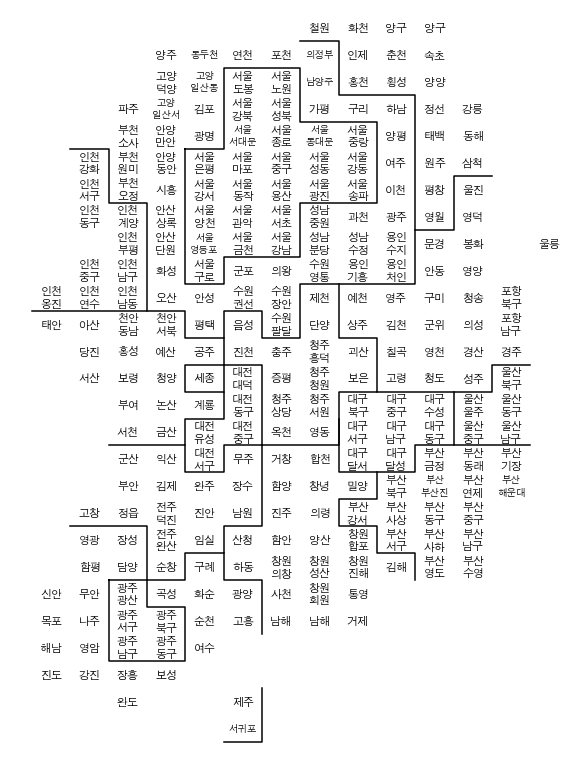

In [35]:
plt.figure(figsize=(8,11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        disnpname='고성'
    else:
        dispname=row['ID']
    
    if len(dispname.splitlines()[-1])>=3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', fontsize=fontsize, ha='center',va='center', linespacing=linespacing)

# 시도 경계 그리기
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black',lw=1.5)

plt.gca().invert_yaxis()

plt.axis('off')
plt.tight_layout()
plt.show()

In [30]:
set(pop['ID'].unique())-set(draw_korea['ID'].unique())

{'고양', '부천', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

In [31]:
tmp_list= list(set(pop['ID'].unique())-set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)

In [50]:
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y_x,x_x,y_x,x_x
0,강원도,강릉시,23098.0,49384.0,35220.0,106231.0,107615.0,213846.0,1.311641,False,강릉,3,11,3,11
1,강원도,고성군,2529.0,7023.0,6634.0,15899.0,14215.0,30114.0,0.762436,True,고성(강원),0,10,0,10
2,강원도,동해시,9753.0,21264.0,14220.0,47166.0,46131.0,93297.0,1.371730,False,동해,4,11,4,11
3,강원도,삼척시,7115.0,15823.0,13592.0,35253.0,34346.0,69599.0,1.046939,False,삼척,5,11,5,11
4,강원도,속초시,8752.0,18708.0,11850.0,40288.0,41505.0,81793.0,1.477131,False,속초,1,10,1,10


In [55]:
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])

/var/folders/6q/cy3y3kyx3218xz2ymsd6n8jc0000gn/T/ipykernel_1300/1721256276.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'y_x', 'x_x'} in the result is deprecated and will raise a MergeError in a future version.
  pop = pd.merge(pop, draw_korea, how='left', on=['ID'])


In [64]:
pop.head()
pop.rename(columns={'y_y':'y','x_y':'x'}, inplace=True)

In [65]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData]))*0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()


### 인구 현황 및 인구 소멸 지역 확인하기

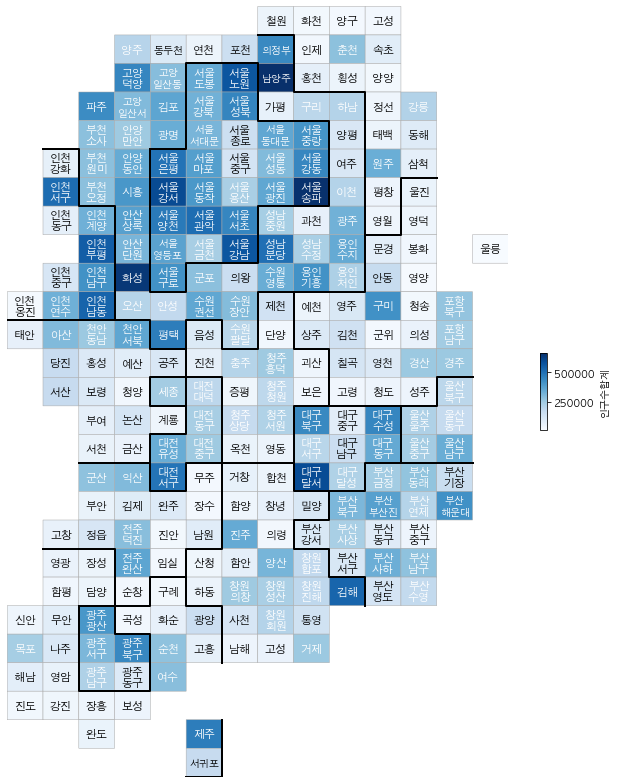

In [66]:
drawKorea('인구수합계',pop,'Blues')

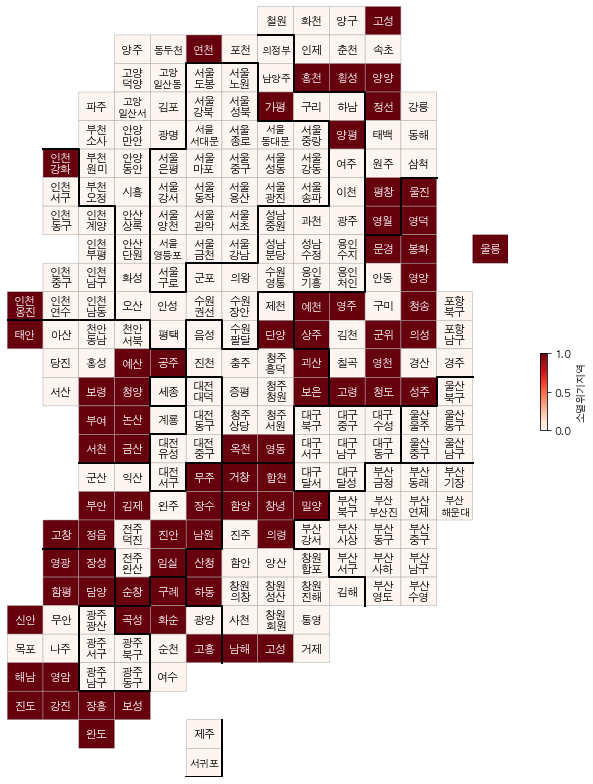

In [69]:
pop['소멸위기지역']=[1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역',pop,'Reds')

### 인구 현황에서 여성 인구 비율 확인 하기 

In [70]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()


#### 여성인구비율에 0.5을 빼서 기준값(0)이 50%를 나타내게 함

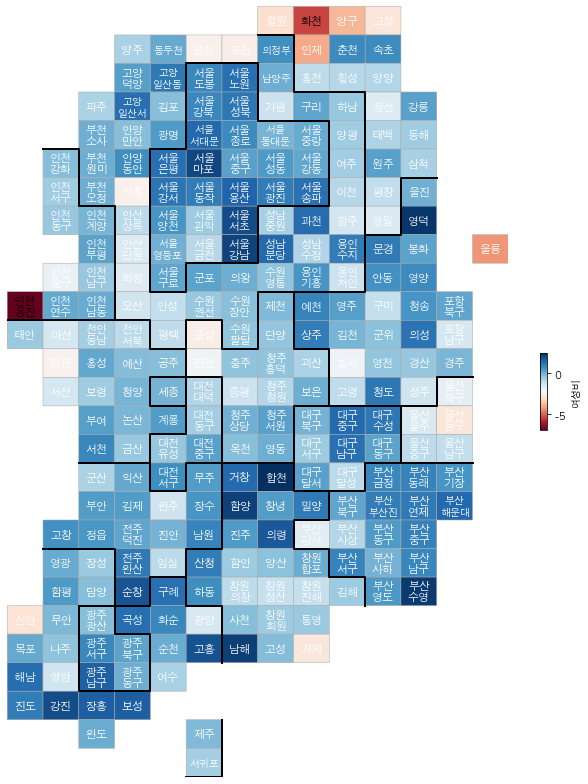

In [73]:
pop['여성비']=(pop['인구수여자']/pop['인구수합계']-0.5)*100
drawKorea('여성비',pop, 'RdBu')

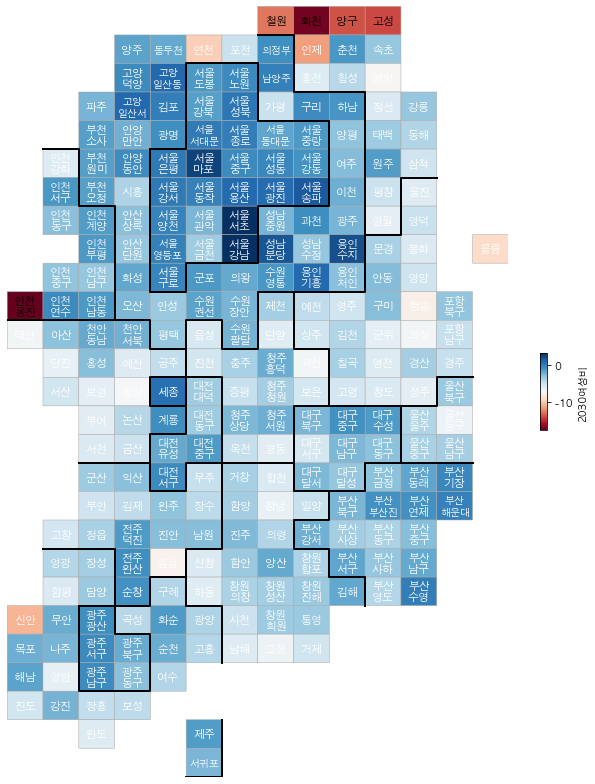

In [74]:
pop['2030여성비']=(pop['20-39세여자']/pop['20-39세합계']-0.5)*100
drawKorea('2030여성비',pop,'RdBu')

### Folium에서 인구 소멸위기 지역 표현하기

In [79]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [81]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,35220.0,106231.0,107615.0,213846.0,1.311641,0,3,11,0.323597,-3.227766
고성(강원),강원도,고성군,2529.0,7023.0,6634.0,15899.0,14215.0,30114.0,0.762436,1,0,10,-2.796042,-13.989748
동해,강원도,동해시,9753.0,21264.0,14220.0,47166.0,46131.0,93297.0,1.371730,0,4,11,-0.554680,-4.133747
삼척,강원도,삼척시,7115.0,15823.0,13592.0,35253.0,34346.0,69599.0,1.046939,0,5,11,-0.651590,-5.033812
속초,강원도,속초시,8752.0,18708.0,11850.0,40288.0,41505.0,81793.0,1.477131,0,1,10,0.743951,-3.217875


In [88]:
geo_path = '../Data/05. skorea_municipalities_geo_simple.json'
geo_path = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)

map.choropleth(geo_data= geo_path, data= pop_folium['인구수합계'],
             columns=[pop_folium.index, pop_folium['인구수합계']],
             fill_color='YlGnBu', key_on='feature.id')
map

In [89]:
map= folium.Map(location=[36.2002, 127.054], zoom_start=7)

map.choropleth(geo_data=geo_path, data=pop_folium['소멸위기지역'],
              columns=[pop_folium.index, pop_folium['소멸위기지역']],
              fill_color='PuRd',key_on='feature.id')

map

In [90]:
draw_korea.to_csv('../data/05. draw_korea.csv', encoding='utf-8',sep=',')